Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00025: Introduction to Vibration Theory


### RESPOSTA DE UM SISTEMA COM UM GRAU DE LIBERDADE A UMA EXCITAÇÃO NA BASE

_Matheus Anderson dos Santos Trindade da Costa_ (Cartão UFRGS: 00312314)  
_Porto Alegre, RS, Brazil_ 


In [188]:
# Importação dos módulos do Python  necessários para esse notebook.
# (Essa célula deve ser executada com o comando "shift+enter" antes de qualquer outra célula do Python.)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from MRPy import MRPy

# MRPy - Multivariate Random Processes with Python  ( https://orcid.org/0000-0001-5640-1020 )

## 1. Introdução <a name="section_1"></a> 

O objetivo do trabalho consiste em se desenvolver um modelo físico simples, de um grau de liberdade, onde se possa fazer a análise numérica do efeito vibratório de base.  

Usando um aplicativo de celular, é medida a aceleração na base do sistema, gerando um arquivo de extensão ".csv". Processando os dados do arquivo é obtido a reposta do sistema, com a qual podemos elaborar um gráfico de pseudospectro. 
Por fim, estimamos os periodogramas de "input" e "output" (dados obtidos do arquivo ".csv" e resposta obtida através da Integral de Duhamel.)

## 2. Obtenção de dados <a name="section_2"></a> 

Para obtenção do arquivo ".csv", que contem informações da aceleração no tempo medidas através do acelerômetro presentes em um celular, é usado um aplicativo desenvolvido pela Bosch (https://appcenter.bosch.com/details/-/app/iNVH) chamado iNVH.

O aplicativo é usado no modo "Vibration" com leitura em "Raw data". A amostra de frequência é definida como "Fastest" e a opção de "In Space Mode" é definida como "Enable".

O celular é colocado na posição representada pela calculadora, conforme a figura abaixo. Os prendedores representam os locais onde foram aplicados os golpes (em simultâneo) de punho serrado, que excitam a mesa a vibrar. Após a aplicação dos golpes aguardamos alguns segundos, para que a mesa dissipe a energia vibratória tendendo a voltar pro estado de repouso inicial. O processo de golpear a mesa é repetido por três vezes.

<img src="images/MESAb.jpg" alt="SDOF system" width="480px"/>
<img src="images/MESAa.jpg" alt="SDOF system" width="480px"/>

## 3. Dados de entrada <a name="section_3"></a> 



Obtido o arquivo ".csv", podemos analisar o comportamento vibratório através dos gráficos abaixo. Os gráficos se referem a aceleração nos eixos X, Y e Z, atráves do tempo, registradas pelo acelerômetro do celular.


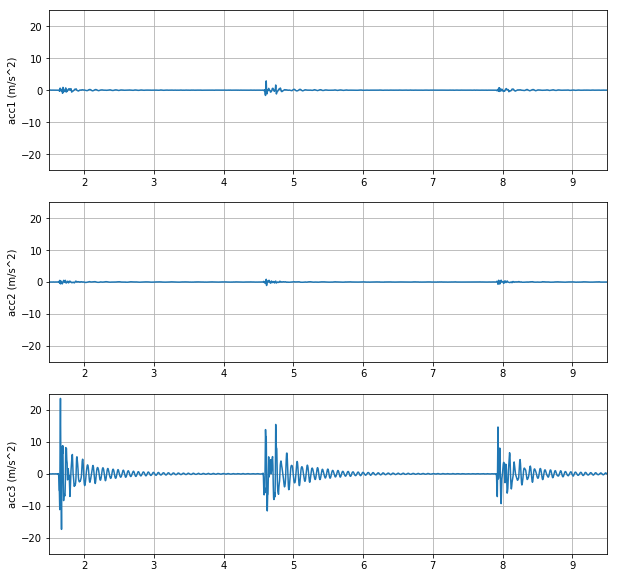

In [189]:
data = MRPy.from_file('data/mesa2', form='invh').zero_mean()
t    = data.t_axis()

plt.figure(6, figsize=(10,10), clear=True)

for kX, acc in enumerate(data):
    
    plt.subplot(3, 1 ,kX+1)
    plt.plot(t, acc)

    plt.xlim(1.5, 9.5);   
    plt.ylim(-25, 25);
    plt.ylabel('acc{0} (m/s^2)'.format(kX+1)) 

    plt.grid(True) 

Para o sistema de um grau de liberdade, a variável de interesse está sobre o eixo Z, como podemos observar nos 3 gráficos. A aceleração nos eixos X e Y são mínimas, já que a mesa vibrou analogamente a uma viga engastada livre, produzindo deslocamentos análogos a flechas em uma viga.

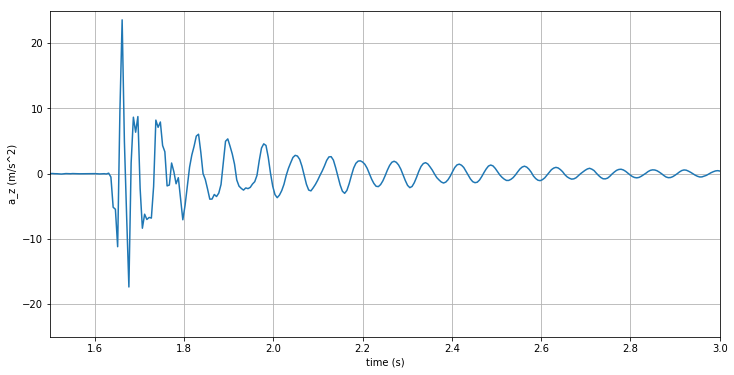

In [190]:
# Isolando gráfico de interesse, correspondente a aceleração no eixo Z.

data = MRPy.from_file('data/mesa2', form='invh').zero_mean()
az   = MRPy(data[2], data.fs)
t    = az.t_axis()

plt.figure(4, figsize=(12, 6), clear=True)
plt.plot(t, az[0])

plt.xlim(1.5,3);  plt.xlabel('time (s)') 
plt.ylim(-25, 25);   plt.ylabel('a_z (m/s^2)') 

plt.grid(True) 

## 4. Espectro de pseudoaceleração <a name="section_4"></a> 



In [191]:
m  = 1                            # Considerando uma massa unitária (Kg)
zt = 0.01                         # Considerando 1% de amortecimento 
Tn = np.linspace(0.01, 10, 100)   # Período natural
fn = 1/Tn                         # Frequência natural do sistema
u0 = 0.                           # Deslocamento inicial (mesa considerada em repouso total no tempo 0)
v0 = 0.                           # Velocidade inicial (mesa considerada em repouso total no tempo 0)

Utilizando a integral de Duhamel, implementada para Python, obtemos um vetor de deslocamentos máximos. Cada valor de deslocamento máximo é obtido variando a o período, consequentemente a frequência natural do sistema. 

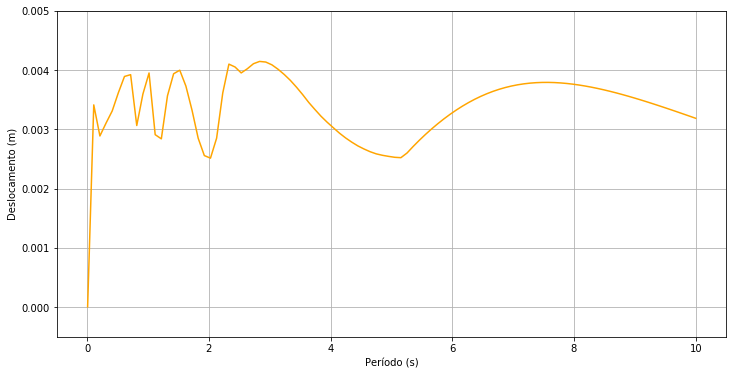

In [192]:
u_DHmax = np.zeros(fn.shape)

for k, f in enumerate(fn):
    u_DH = az.sdof_Duhamel(f, zt, u0, v0)/m
    u_DHmax[k] = u_DH.max()
    
plt.figure(5, figsize=(12, 6), clear=True)
plt.plot(Tn, umax, 'orange')

plt.xlim(-0.5,10.5);  plt.xlabel('Período (s)') 
plt.ylim(-0.0005,0.005 );   plt.ylabel('Deslocamento (m)') 

plt.grid(True) 

Fazendo uso da equação:

$$ a_{\rm p} = \omega_{\rm }^2 u_{\rm p}   $$

Onde:

$$ \omega_{\rm }  = 2 \pi f_{\rm }$$

Podemos calcular o espectro de pseudoaceleração do sistema, plotando o mesmo em um gráfico mostrado abaixo.

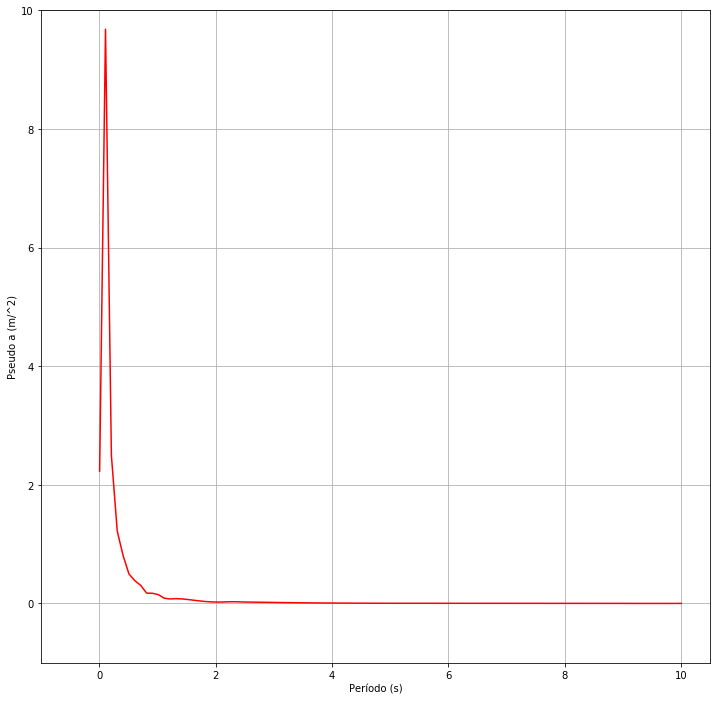

In [193]:
pseu = ((2*np.pi*fn)**2)*u_DHmax
plt.figure(6, figsize=(12, 12), clear=True)
plt.plot(Tn, pseu, 'r')

plt.xlim(-1, 10.5);        plt.xlabel('Período (s)') 
plt.ylim(-1, 10);  plt.ylabel('Pseudo a (m/^2)') 

plt.grid(True)

## 5. Periodograma Input <a name="section_5"></a> 



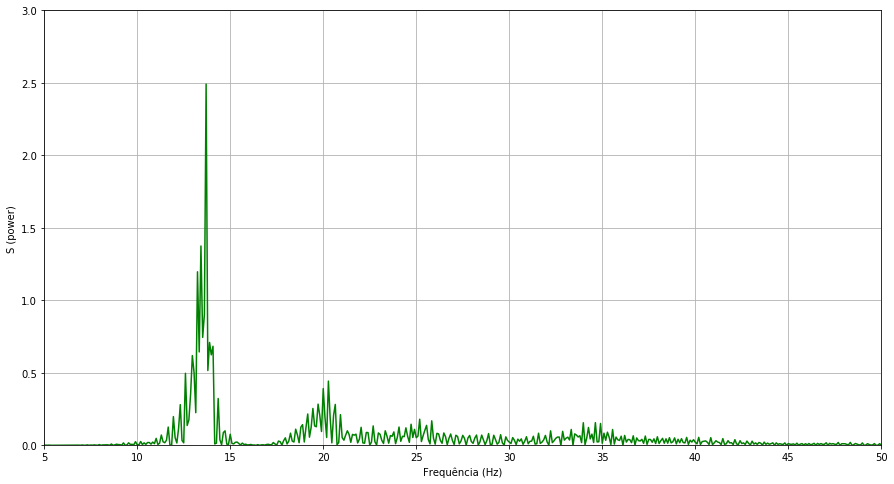

In [194]:
# Periodograma considerando input

S, fs = az.periodogram()
f       = az.f_axis()

plt.figure(8, figsize=(15, 8), clear=True)
plt.plot(f, Saz[0],'g' )

plt.xlim(5, 50);   plt.xlabel('Frequência (Hz)') 
plt.ylim(0,  3);   plt.ylabel('S (power)') 

plt.grid(True)

O gráfico mostra que a energia do sistema tem um pico para uma frequência próxima a 14Hz. Isso demostra que para o sistema considerado, a frequência natural fica próxima de 14Hz.

## 6. Periodograma output <a name="section_6"></a> 



Conforme a resposta "input", calcularemos a integral de Duhamel para uma frequência de 14Hz. Em seguida, o periodograma da integral.

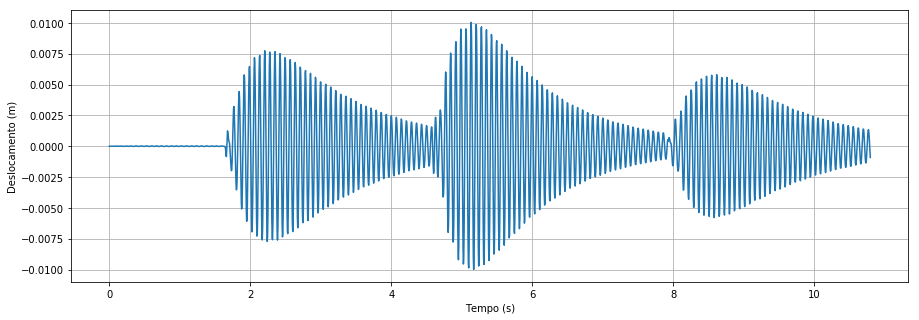

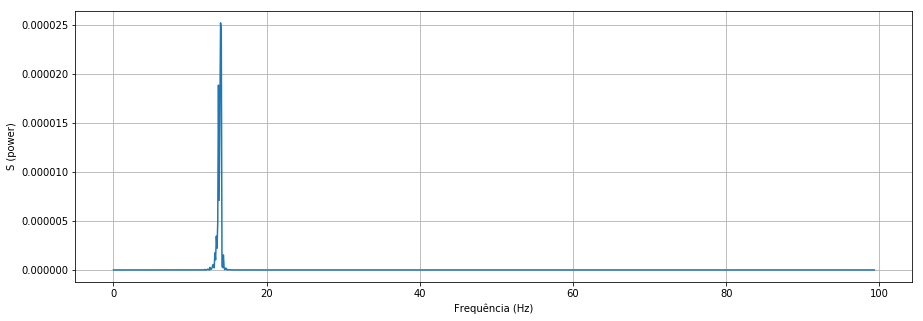

In [210]:
# Periodograma considerando output

fut = 14
u_DHout = az.sdof_Duhamel(fut, zt, u0, v0)/m

plt.figure(figsize=(15, 5))
plt.plot(t, u_DHout[0])
plt.xlabel('Tempo (s)') 
plt.ylabel('Deslocamento (m)')

plt.grid(True)

Sut, fut = u_DHout.periodogram()
fut = u_DHout.f_axis()

plt.figure(figsize=(15, 5))
plt.plot(fut, Sut[0])
plt.xlabel('Frequência (Hz)') 
plt.ylabel('S (power)')  

plt.grid(True)

## 7. Conclusão <a name="section_1"></a> 

Podemos ver que o gráfico do espectro de pseudoaceleração nos fornece a resposta sofrida pelo sistema quando submetido a uma excitação. Isso nos permite observar o comportamento dinâmico do sistema, conforme o período varia. O valor máximo de aceleração pode ser observado abaixo.

In [209]:
print (max (pseu))

9.684128555215752


Os periodogramas se mostraram também de extrema importância, podendo revelar a densidade de energia e deslocamento referentes. Em especial o periodograma de input se mostra uma ferramenta extremamente útil, para obter uma aproximação da frequência natural de maneira rápida e fácil.